In [4]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[3, 1], edge_index=[2, 4])


chaque colonne du tenseur edge_index est une arête
genre y a une arête entre 1 et 2 par exemple

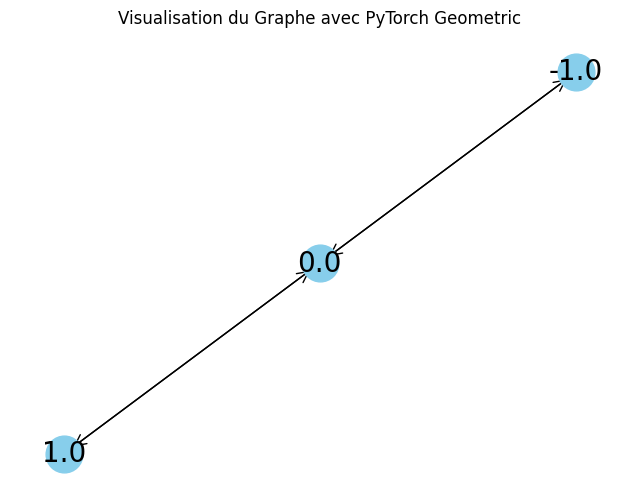

In [8]:
# Conversion en graphe NetworkX
G = to_networkx(data, to_undirected=False)  # Utiliser to_undirected=False pour conserver la direction

# Positionnement des nœuds pour une meilleure visualisation
pos = nx.spring_layout(G)

# Extraction des caractéristiques des nœuds pour l'affichage
labels = {i: f"{data.x[i].item()}" for i in range(data.num_nodes)}

# Dessin du graphe avec flèches
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, labels, font_size=20, font_color='black')

plt.title("Visualisation du Graphe avec PyTorch Geometric")
plt.axis('off')
plt.show()

on peut aussi mettre les arêtes comme ça c'est plus pratique je trouve

In [13]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())
print(data)

Data(x=[3, 1], edge_index=[2, 4])


In [10]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

def visualise_graph(data: Data):
    """
    Visualise un graphe PyTorch Geometric en utilisant NetworkX et Matplotlib.

    Parameters:
    -----------
    data : torch_geometric.data.Data
        L'objet Data contenant les informations du graphe, y compris les caractéristiques des nœuds et les arêtes.

    Returns:
    --------
    None
        Affiche une visualisation du graphe.
    """
    # Vérifier que l'objet Data contient 'edge_index' et 'x'
    if not hasattr(data, 'edge_index') or not hasattr(data, 'x'):
        raise ValueError("L'objet Data doit contenir 'edge_index' et 'x'.")

    # Conversion en graphe NetworkX
    G = to_networkx(data, to_undirected=False)  # Conserver la direction des arêtes

    # Positionnement des nœuds pour une meilleure visualisation
    pos = nx.spring_layout(G)

    # Extraction des caractéristiques des nœuds pour l'affichage
    # Si les nœuds ont plusieurs caractéristiques, vous pouvez ajuster cela
    # Par exemple, pour afficher la deuxième caractéristique (id), utilisez data.x[i][1]
    if data.x.dim() == 1:
        # Si 'x' est un vecteur, utiliser directement
        labels = {i: f"{data.x[i].item()}" for i in range(data.num_nodes)}
    else:
        # Si 'x' a plusieurs dimensions, ajuster en fonction de vos besoins
        # Ici, j'utilise la deuxième caractéristique comme ID si elle existe
        if data.x.size(1) >= 2:
            labels = {i: f"ID: {int(data.x[i, 1].item())}" for i in range(data.num_nodes)}
        else:
            labels = {i: f"{data.x[i].item()}" for i in range(data.num_nodes)}

    # Dessin du graphe avec flèches
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=G.edges(),
        arrows=True,
        arrowstyle='->',
        arrowsize=20,
        edge_color='gray',
        width=2
    )
    nx.draw_networkx_labels(G, pos, labels, font_size=16, font_color='black')

    plt.title("Visualisation du Graphe avec PyTorch Geometric")
    plt.axis('off')
    plt.show()

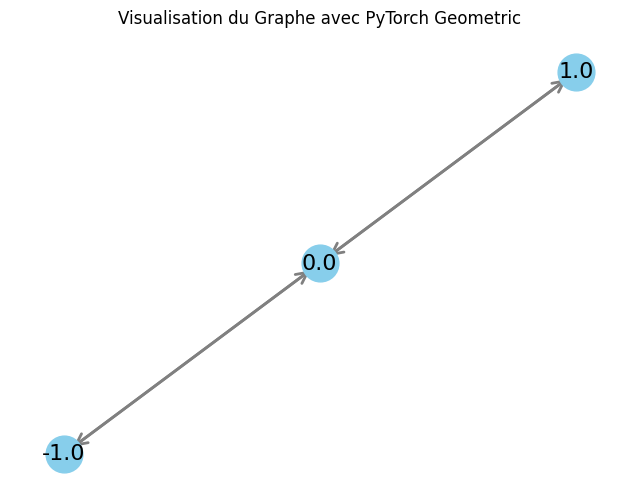

In [11]:
visualise_graph(data)

In [12]:
data.validate(raise_on_error=True)

True

permet de savoir si notre nos données sont cohérentes dans notre graph

verifs faites :
- présence des attributs essentiels  (edge_index, etc)
- dimensions correctes 
- types de données appropriées (type)

In [14]:
print(data.keys())

['x', 'edge_index']


In [15]:
print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [16]:
for key, item in data:
    print(f'{key} found in data')

x found in data
edge_index found in data


In [17]:
'edge_attr' in data

False

In [18]:
'edge_index' in data

True

In [19]:
data.num_nodes

3

In [20]:
data.num_edges

4

In [21]:
data.num_node_features

1

In [22]:
data.has_isolated_nodes()

False

In [23]:
data.has_self_loops()

False

In [24]:
data.is_directed()

False

In [25]:
# Supprimer l'arête 2 → 1 pour rendre le graphe dirigé
edge_index_directed = torch.tensor([[0, 1, 1],
                                    [1, 0, 2]], dtype=torch.long)

data = Data(x=x, edge_index=edge_index_directed)

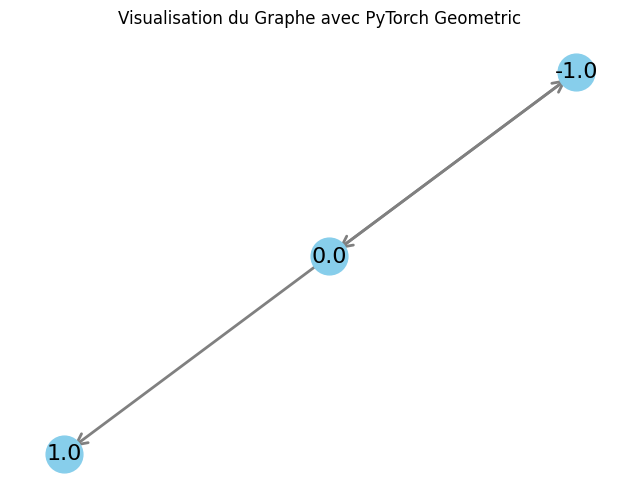

In [28]:
data.is_directed()
visualise_graph(data)

In [29]:
# Définir le dispositif en fonction de la disponibilité de MPS, CUDA ou CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Utilisation du GPU MPS sur Mac.")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Utilisation du GPU CUDA.")
else:
    device = torch.device("cpu")
    print("Utilisation du CPU.")

Utilisation du GPU MPS sur Mac.


In [30]:
data = data.to(device)

# Vérifier le dispositif de l'objet Data
print(f"Objet Data transféré sur : {data.x.device}")

Objet Data transféré sur : mps:0


In [31]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Processing...
Done!


In [33]:
dataset.num_classes

6

In [34]:
dataset.num_node_features

3

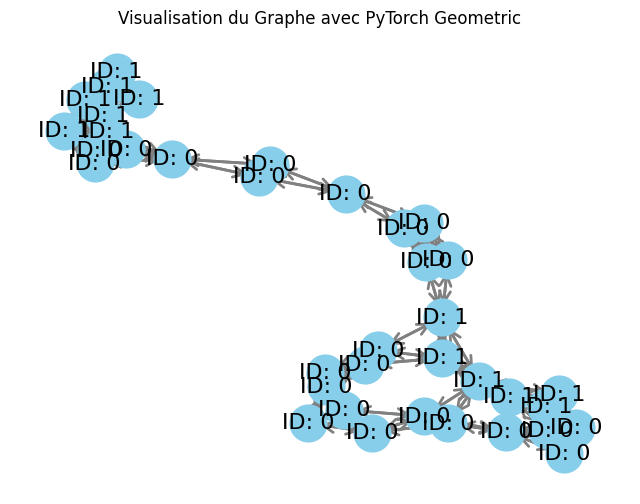

In [36]:
data = dataset[0]
visualise_graph(data)

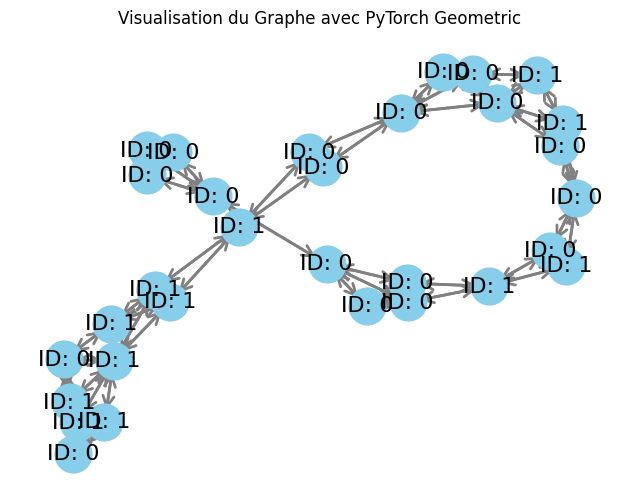

In [38]:
dataset = dataset.shuffle()
data = dataset[0]
visualise_graph(data)

In [39]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')

Processing...
Done!


In [40]:
len(dataset)

1

In [41]:
print(dataset.num_classes)
print(dataset.num_node_features)

7
1433


In [42]:
data = dataset[0]

print(data.is_undirected())

print(data.train_mask.sum().item())

print(data.val_mask.sum().item())


print(data.test_mask.sum().item())

True
140
500
1000


Ces masques sont des vecteurs booléens de forme [num_nodes] qui indiquent quels nœuds appartiennent respectivement aux ensembles d’entraînement, de validation et de test.
	•	Chaque élément du masque est True (ou 1) si le nœud correspondant fait partie de l’ensemble concerné, sinon False (ou 0).

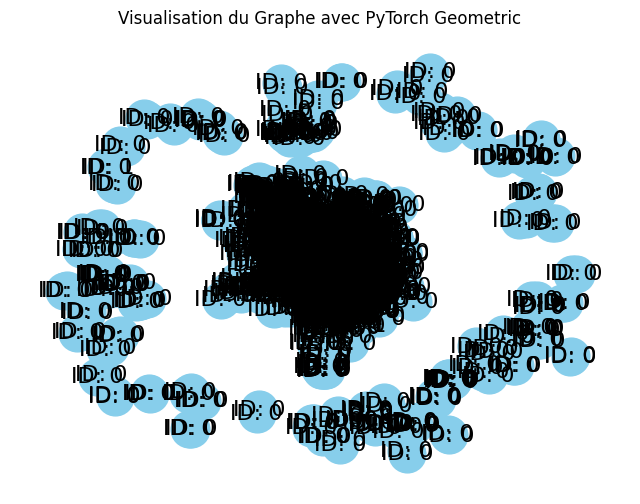

In [43]:
visualise_graph(data)

In [44]:
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


là on peut voir que y a 10556 arêtes
y a 2 708 noeuds et chaque noeud possède 1 433 caractéristiques.

In [45]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data
from torch.utils.tensorboard import SummaryWriter  # Import de SummaryWriter

# Exemple avec le dataset Cora
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        return x

model = GCN(num_features=dataset.num_features, hidden_channels=16, num_classes=dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Initialisation du SummaryWriter
writer = SummaryWriter(log_dir='runs/GCN_Cora')  # Vous pouvez personnaliser le chemin du répertoire des logs

def train(epoch):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test(mask):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    correct = pred[mask] == data.y[mask]
    acc = int(correct.sum()) / int(mask.sum())
    return acc

num_epochs = 200

for epoch in range(1, num_epochs + 1):
    loss = train(epoch)
    
    # Calcul des métriques toutes les 10 époques
    if epoch % 10 == 0:
        train_acc = test(data.train_mask)
        val_acc = test(data.val_mask)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')
        
        # Enregistrement des métriques dans TensorBoard
        writer.add_scalar('Loss/train', loss, epoch)
        writer.add_scalar('Accuracy/train', train_acc, epoch)
        writer.add_scalar('Accuracy/val', val_acc, epoch)

# Evaluation finale sur l'ensemble de test
test_acc = test(data.test_mask)
print(f'Test Accuracy: {test_acc:.4f}')

# Enregistrement de la métrique de test
writer.add_scalar('Accuracy/test', test_acc, num_epochs)

# Fermer le SummaryWriter
writer.close()

Epoch: 010, Loss: 0.6241, Train Acc: 0.9857, Val Acc: 0.7600
Epoch: 020, Loss: 0.1079, Train Acc: 1.0000, Val Acc: 0.7800
Epoch: 030, Loss: 0.0272, Train Acc: 1.0000, Val Acc: 0.7800
Epoch: 040, Loss: 0.0144, Train Acc: 1.0000, Val Acc: 0.7860
Epoch: 050, Loss: 0.0127, Train Acc: 1.0000, Val Acc: 0.7900
Epoch: 060, Loss: 0.0141, Train Acc: 1.0000, Val Acc: 0.7940
Epoch: 070, Loss: 0.0158, Train Acc: 1.0000, Val Acc: 0.7880
Epoch: 080, Loss: 0.0167, Train Acc: 1.0000, Val Acc: 0.7860
Epoch: 090, Loss: 0.0165, Train Acc: 1.0000, Val Acc: 0.7840
Epoch: 100, Loss: 0.0157, Train Acc: 1.0000, Val Acc: 0.7800
Epoch: 110, Loss: 0.0148, Train Acc: 1.0000, Val Acc: 0.7820
Epoch: 120, Loss: 0.0139, Train Acc: 1.0000, Val Acc: 0.7780
Epoch: 130, Loss: 0.0133, Train Acc: 1.0000, Val Acc: 0.7800
Epoch: 140, Loss: 0.0127, Train Acc: 1.0000, Val Acc: 0.7800
Epoch: 150, Loss: 0.0122, Train Acc: 1.0000, Val Acc: 0.7780
Epoch: 160, Loss: 0.0117, Train Acc: 1.0000, Val Acc: 0.7760
Epoch: 170, Loss: 0.0113

In [46]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for batch in loader:
    print(batch)
    print(batch.num_graphs)

DataBatch(edge_index=[2, 3838], x=[956, 21], y=[32], batch=[956], ptr=[33])
32
DataBatch(edge_index=[2, 3754], x=[963, 21], y=[32], batch=[963], ptr=[33])
32
DataBatch(edge_index=[2, 4400], x=[1200, 21], y=[32], batch=[1200], ptr=[33])
32
DataBatch(edge_index=[2, 3754], x=[930, 21], y=[32], batch=[930], ptr=[33])
32
DataBatch(edge_index=[2, 4108], x=[1113, 21], y=[32], batch=[1113], ptr=[33])
32
DataBatch(edge_index=[2, 4338], x=[1092, 21], y=[32], batch=[1092], ptr=[33])
32
DataBatch(edge_index=[2, 3688], x=[1000, 21], y=[32], batch=[1000], ptr=[33])
32
DataBatch(edge_index=[2, 4054], x=[1036, 21], y=[32], batch=[1036], ptr=[33])
32
DataBatch(edge_index=[2, 4286], x=[1191, 21], y=[32], batch=[1191], ptr=[33])
32
DataBatch(edge_index=[2, 4068], x=[1055, 21], y=[32], batch=[1055], ptr=[33])
32
DataBatch(edge_index=[2, 3668], x=[994, 21], y=[32], batch=[994], ptr=[33])
32
DataBatch(edge_index=[2, 4390], x=[1142, 21], y=[32], batch=[1142], ptr=[33])
32
DataBatch(edge_index=[2, 3508], x=[9

contrairement aux données tabulaires pour faire du mini batch avec des gnns c'est un peu plus particulier 

PyG fournit son propre DataLoader, qui hérite de torch.utils.data.DataLoader mais est spécialement conçu pour gérer les graphes hétérogènes

PyG crée un grand graphe qui contient tous les graphes individuels du mini-batch comme des sous-graphes distincts. Pour éviter les interconnexions non désirées entre les graphes, PyG utilise une matrice d’adjacence bloc-diagonale :
	•	Recalage des Indices d’Arêtes : Les indices des nœuds (edge_index) de chaque graphe sont ajustés pour correspondre à leurs positions dans le grand graphe concaténé.
	•	Conservation des Graphes Indépendants : Chaque graphe reste séparé, car il n’y a pas d’arêtes entre les nœuds de différents graphes (sauf si explicitement défini).

In [48]:
from torch_geometric.utils import scatter
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for data in loader:
    print(data)
    print(data.num_graphs)

    x = scatter(data.x, data.batch, dim=0, reduce='mean')
    print(x.size())

DataBatch(edge_index=[2, 3904], x=[997, 21], y=[32], batch=[997], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4340], x=[1147, 21], y=[32], batch=[1147], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3896], x=[1034, 21], y=[32], batch=[1034], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3950], x=[984, 21], y=[32], batch=[984], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4050], x=[1065, 21], y=[32], batch=[1065], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4274], x=[1254, 21], y=[32], batch=[1254], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4188], x=[1132, 21], y=[32], batch=[1132], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3252], x=[808, 21], y=[32], batch=[808], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3960], x=[1020, 21], y=[32], batch=[1020], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4208], x=[1128, 21], y=[32], batch=[1128], ptr=[33])
32
torch.S

In [50]:
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'])

dataset[0]

URLError: <urlopen error [Errno 61] Connection refused>

méthodes spectrales -> concepts mathématiques avancés comme la transfo de fouriée , -> on def des operations de convolutions comme pour les CNNs dans le domaine frequentiel, ca apprend a extraire des signatures pour apprendre a extraire des caracteristiques importantes
permet de faire des choses complexes mais inconvéniant : lourd computationnellement 
méthodes spatiales -> def des convolutions sur le graph en se basant sur les relations locales entre noeuds sans passer par une decomposition spectrale , c'est plus intuitif et
c'est executable computationnellement pour des trucs complexes et par contre c'est plus dur de generaliser et voir des trucs globaux vu qu'on focus sur le local 